## [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning)

The decision tree is an old, but still relevant nonlinear learning algorithm. The leaves of the tree represent distinct subsets of the training data. The other nodes compare a given attribute to a threshold value (e.g. is the body temperature < 37 °C). The branches starting from the node are associated with the two possible outcomes of the comparison.

<img src="../_img/decision_tree.jpg" width="400" align="left">

In this notebook, we will prepare the simplest version of the decision tree called [decision stump](https://en.wikipedia.org/wiki/Decision_stump), and we will test it on the Boston Housing data set. Moreover, we will explore the capabilities of scikit-learn's decision tree algorithm.

<img src="../_img/decision_stump.png" width="500" align="left">

**Exercise 2**: Implement the training of the decision stump regressor from scratch, and measure the model's root mean squared error (RMSE) on the full Boston Housing data set!

In [20]:
# Loading the data.
import pandas as pd
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
         'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
df = pd.read_csv('../_data/housing_data.txt', delim_whitespace=True, names=names)
X = df[df.columns[:-1]].values # input matrix
y = df['MEDV'].values          # target vector

In [21]:
import numpy as np

n, d = X.shape
sse_min = np.inf
for j in range(d): # iterate over features
    x = X[:, j] # select j-th column

    # sort input and target by target
    idxs = np.argsort(x)
    x_sorted = x[idxs]
    y_sorted = y[idxs]

    midpoints = (x_sorted[1:] + x_sorted[:-1]) / 2
    for i, t in enumerate(midpoints): # iterate over threshold values
        k = i + 1
        yhat_L = y_sorted[:k].mean() # average target on the left side
        yhat_R = y_sorted[k:].mean() # average target on the left side
        sse_L = ((yhat_L - y_sorted[:k])**2).sum()
        sse_R = ((yhat_R - y_sorted[k:])**2).sum()
        sse = sse_L + sse_R
        
        if sse < sse_min: # we have found a better decision than the current best
            sse_min = sse
            j_best, t_best = j, t
            yhat_L_best, yhat_R_best = yhat_L, yhat_R
            print(sse, j, t)

42714.138495049505 0 0.007690000000000001
42654.06214285715 0 0.01001
42607.60066733068 0 0.01306
42487.76150099801 0 0.013354999999999999
42237.84195247638 0 0.014065
42153.999678714856 0 0.014355
42111.73079365079 0 0.014700000000000001
41739.21143434343 0 0.015195
41403.70269905533 0 0.016235
41349.519812763305 0 0.017435
41236.26263646922 0 0.01824
41205.95119132654 0 0.01958
40890.95242258652 0 0.020319999999999998
40635.159448559665 0 0.02182
40556.32548257241 0 0.023425
40547.17303427895 0 0.03393
40380.59639339103 0 0.035235
40254.02162255965 0 0.035809999999999995
40253.174434710054 0 0.03637
40116.550764971194 0 0.037215
40053.84481361776 0 0.038195
40050.55321587302 0 0.04158
40026.656188803965 0 0.060615
39928.78982113821 0 0.06128
39665.01313689411 0 0.061399999999999996
39608.649885609964 0 0.06874
39463.265595959594 0 0.068935
39343.75913705584 0 0.06908
39265.912307865525 0 0.06962
39210.16856426781 0 0.070175
39155.07983894646 0 0.078805
38989.80508618654 0 0.078910000

In [5]:
j_best, t_best, sse_min

(5, 6.941, 23376.74038861689)

In [6]:
df.columns[j_best] + ' < ' + str(t_best)

'RM < 6.941'

In [7]:
yhat_L_best, yhat_R_best

(19.933720930232557, 37.238157894736844)

**Exercise 3**: Repeat the previous experiment using scikit-learn!

In [22]:
from sklearn.tree import DecisionTreeRegressor
re = DecisionTreeRegressor(max_depth=1)
re.fit(X, y)

DecisionTreeRegressor(max_depth=1)

In [23]:
# Internal parameters of the trained model (.tree_.{feature, threshold, value})
print(re.tree_.feature)
print(re.tree_.threshold)
print(re.tree_.value)

[ 5 -2 -2]
[ 6.94099998 -2.         -2.        ]
[[[22.53280632]]

 [[19.93372093]]

 [[37.23815789]]]


**Execrice 4**: Apply 3-fold cross-validation!

In [24]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def evaluate(re, X, y):
    cv = KFold(3, shuffle=True, random_state=42)
    scores = []
    for tr, te in cv.split(X):
        re.fit(X[tr], y[tr])
        yhat = re.predict(X)
        score = mean_squared_error(y[te], yhat[te])**0.5
        scores.append(score)
    return np.mean(scores)

evaluate(DecisionTreeRegressor(max_depth=1, random_state=42), X, y)

7.435013307929704

**Exercise 5:** Determine what maximal depth gives the lowest RMSE!

<AxesSubplot: xlabel='max_depth'>

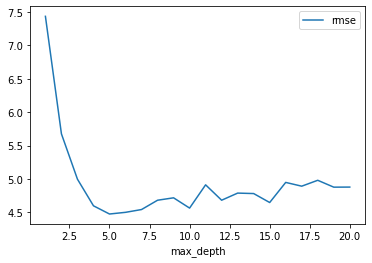

In [25]:
res = []
for max_depth in range(1, 21):
    re = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    res.append({
        'max_depth': max_depth,
        'rmse': evaluate(re, X, y)
    })
df_res = pd.DataFrame(res)
df_res.set_index('max_depth').plot()

**Exercise 6**: Train a decision tree of depth 3 and visualize the trained model!

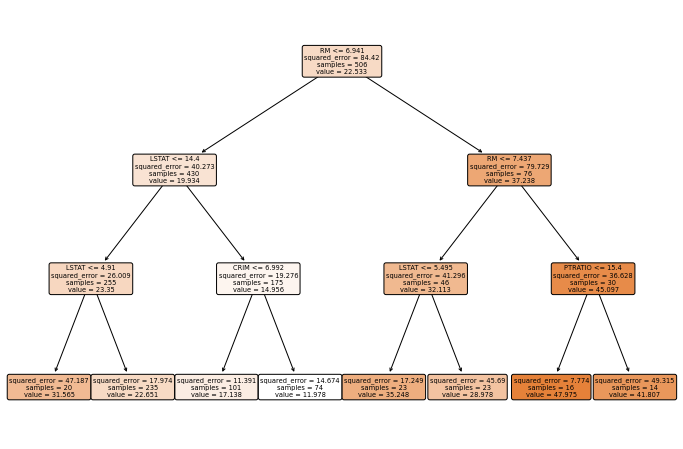

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

re = DecisionTreeRegressor(max_depth=3, random_state=42, min_samples_leaf=10)
re.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(re, filled=True, rounded=True, feature_names=names[:-1])
pass

In [30]:
# Number of parameters in the tree.
(re.tree_.feature >= 0).sum()*2

14

In [31]:
# Total size of the data set.
X.shape[0] * X.shape[1]

6072

## Decision Trees for Classification

- Decision trees can also be applied to classification problems.


- The necessary modification is that instead of sum of squared error, a different split criterion should be applied (e.g. misclassification count, [Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), [information gain](https://en.wikipedia.org/wiki/Decision_tree_learning#Information_gain)), and the leaf predictions should be changed to class probabilities.


- Decision trees can handle multiclass problems too.

**Exercise 7**: Apply a decision tree classifier for the Wisconsin Breast Cancer data set! Use 5-fold cross-validation! The evaluation metric should be the ratio of correct classifications. Determine the maximal depth that gives the highest accuracy! Compare the best decision tree against logistic regression!

In [32]:
# Load the data to DataFrame.
import pandas as pd
names = [
    'Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size',
    'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
]
df = pd.read_csv('../_data/wisconsin_data.txt', sep=',', names=names, na_values='?')
df['Bare_Nuclei'].fillna(0, inplace=True)
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [36]:
X = df[df.columns[1:-1]].values
y = (df['Class'] // 2 -1).values

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def evaluate(cl, X, y):
    cv = KFold(5, shuffle=True, random_state=42)
    scores = []
    for tr, te in cv.split(X):
        cl.fit(X[tr], y[tr])
        yhat = cl.predict(X)
        scores.append(accuracy_score(y[te], yhat[te]))
    return np.mean(scores)

<AxesSubplot: xlabel='max_depth'>

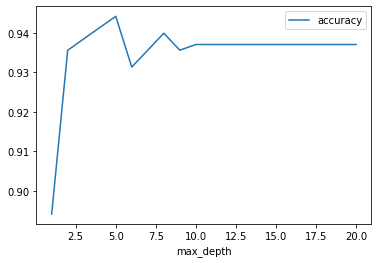

In [46]:
res = []
for max_depth in range(1, 21):
    cl = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    res.append({
        'max_depth': max_depth,
        'accuracy': evaluate(cl, X, y)
    })
df_res = pd.DataFrame(res)
df_res.set_index('max_depth').plot()

## Decision Trees vs. Linear Models

Decision trees
- ...are insensitive to the scale of the input features 😀
- ...are easier to explain 😀
- ...can learn complex patterns 😀
- ...don not handle sparse data efficiently ☹️
- ...tend to overfit more ☹️